# Полнота и Точность от степени уверенности

In [2]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>"))

import importlib # использую для перегрузки библиотек
import time
from IPython.display import clear_output
import random
import warnings

import pandas as pd
import json
import numpy as np
import artm
import matplotlib.pyplot as plt

import data_preparing
import artm_model
import work_with_model as wwm

importlib.reload(data_preparing)
importlib.reload(artm_model)
importlib.reload(wwm)

warnings.filterwarnings("ignore")

clear_output(True)

artm.version() 0.9.2
artm.version() 0.9.2
artm.version() 0.9.2
artm.version() 0.9.2


#### обучим простую модель

In [7]:
inf = {}
inf['exp_name'] = 'weight_1_0_10_50'
inf['test_size'] = 0.1
inf['num_collection_passes'] = 10
inf['topic_number'] = 750
inf['data_path'] = "service_cards_tokenised_remont_only"

inf['docs'] = data_preparing.read_and_prepared(inf['data_path'])
inf['path_train'], inf['path_test'] = data_preparing.form_test_train_set(
                docs=inf['docs'], name=inf['exp_name'], test_size=inf['test_size'])
inf['path_castom'] = data_preparing.form_castom_set(inf['docs'], name=inf['exp_name'])
inf['model'], inf['theta_train'] = artm_model.create_and_learn_PLSA_class_ids_weigth(
                                            inf['path_train'], 
                                            topic_number=inf['topic_number'], 
                                            num_collection_passes=inf['num_collection_passes'], 
                                            weigths=[1., 0., 10., 50.]
                                         )

inf['theta_test'] = wwm.get_theta_from_vw(inf, inf['path_test'])
inf['theta_castom'] = wwm.get_theta_from_vw(inf, inf['path_castom'])
clear_output(True)

wwm.make_docs_dicts(inf)
wwm.form_card2topic(inf)
wwm.get_topic2rubric(inf)
#wwm.measure_accuracy_on_test(inf)
wwm.make_prediction_by_p_cd(inf, mode='castom')
inf['method_topic2rubric_card2rubric_castom'] = wwm.make_prediction_by_topic2rubric(inf, mode='castom')
wwm.make_prediction_by_p_cd(inf, mode='test')
inf['method_topic2rubric_card2rubric_test'] = wwm.make_prediction_by_topic2rubric(inf, mode='test')
wwm.accuracy_on_test(inf, inf['method_topic2rubric_card2rubric_test'])
wwm.accuracy_on_test(inf, inf['p_cd_card2rubric_test'])
wwm.calc_all_scores(inf, inf['method_topic2rubric_card2rubric_test'])

44952  /  66104 0.6800193634273266
42966  /  66104 0.6499757957158417


0.6499757957158417

#### считать пресижн и рекол тут не корректно, но попытка была 

In [12]:
wwm.calc_all_scores(inf, inf['method_topic2rubric_card2rubric_test'])

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
weight_1_0_10_50
precision 0.705527827479047
recall 0.9495162857504964
F1 0.8095375306151852
tp, fp, fn, tn := 44952 18762 2390 0


#### Порог уверенности для модели предсказания модальностей ProbStickTM

In [40]:
wwm.make_shy_prediction_by_p_cd(inf, mode='test', tr_shyness=0.0)
inf['method_topic2rubric_card2rubric_test'] = wwm.make_prediction_by_topic2rubric(inf, mode='test')
wwm.accuracy_on_test(inf, inf['method_topic2rubric_card2rubric_test'])
wwm.accuracy_on_test(inf, inf['p_cd_card2rubric_test'])
wwm.calc_all_scores(inf, inf['p_cd_card2rubric_test'])

44952  /  66104 0.6800193634273266
42966  /  66104 0.6499757957158417
weight_1_0_10_50
precision 0.6499757957158417
recall 0.6499757957158417
tfind, ffind, ffindr, fignore, tignore, n := 42966 23138 0 0 0 66104


#### распределение количества документов с нужной уверенностью

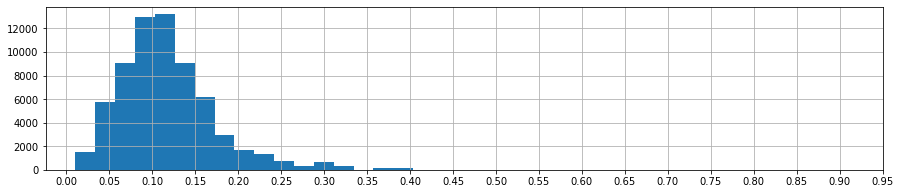

In [42]:
plt.figure(figsize=(15,3))
plt.hist(inf['p_cd_test'].max(), bins=30)
plt.grid(b=True, axis='both')
plt.xticks(ticks=np.arange(0, 1, 0.05))
plt.show()

In [43]:
wwm.make_shy_prediction_by_p_cd(inf, mode='test', tr_shyness=0.05)
inf['method_topic2rubric_card2rubric_test'] = wwm.make_prediction_by_topic2rubric(inf, mode='test')
wwm.accuracy_on_test(inf, inf['method_topic2rubric_card2rubric_test'])
wwm.accuracy_on_test(inf, inf['p_cd_card2rubric_test'])
wwm.calc_all_scores(inf, inf['p_cd_card2rubric_test'])

44952  /  66104 0.6800193634273266
41566  /  66104 0.6287970470773326
weight_1_0_10_50
precision 0.67824100513992
recall 0.6287970470773326
tfind, ffind, ffindr, fignore, tignore, n := 41566 19719 0 4819 0 66104


#### точность полнота в зависимости от уверенности

In [53]:
precision_list = []
recall_list = []
for tr in np.arange(0, 1, 0.01):
    wwm.make_shy_prediction_by_p_cd(inf, mode='test', tr_shyness=tr)
    wwm.accuracy_on_test(inf, inf['p_cd_card2rubric_test'])
    precision, recall = wwm.calc_all_scores(inf, inf['p_cd_card2rubric_test'])
    precision_list.append(precision)
    recall_list.append(recall)

42966  /  66104 0.6499757957158417
weight_1_0_10_50
precision 0.6499659632402995
recall 0.6499659632402995
tfind, ffind, ffindr, fignore, tignore, n := 42966 23138 0 0 0 66104
42966  /  66104 0.6499757957158417
weight_1_0_10_50
precision 0.6499659632402995
recall 0.6499659632402995
tfind, ffind, ffindr, fignore, tignore, n := 42966 23138 0 0 0 66104
42948  /  66104 0.6497034975190609
weight_1_0_10_50
precision 0.6511416355862821
recall 0.6496936691626957
tfind, ffind, ffindr, fignore, tignore, n := 42948 23009 0 147 0 66104
42840  /  66104 0.6480697083383758
weight_1_0_10_50
precision 0.6582060658206066
recall 0.6480599046970729
tfind, ffind, ffindr, fignore, tignore, n := 42840 22245 0 1019 0 66104
42142  /  66104 0.6375105893743193
weight_1_0_10_50
precision 0.6657609124946682
recall 0.6375009454655473
tfind, ffind, ffindr, fignore, tignore, n := 42142 21156 0 2806 0 66104
41566  /  66104 0.6287970470773326
weight_1_0_10_50
precision 0.6782299383219659
recall 0.6287875349822253
tfind

26  /  66104 0.0003933196175723103
weight_1_0_10_50
precision 0.6842105263157895
recall 0.00039331366764995085
tfind, ffind, ffindr, fignore, tignore, n := 26 11 0 66067 0 66104
25  /  66104 0.0003781919399733753
weight_1_0_10_50
precision 0.6756756756756757
recall 0.0003781862188941835
tfind, ffind, ffindr, fignore, tignore, n := 25 11 0 66068 0 66104
25  /  66104 0.0003781919399733753
weight_1_0_10_50
precision 0.6756756756756757
recall 0.0003781862188941835
tfind, ffind, ffindr, fignore, tignore, n := 25 11 0 66068 0 66104
25  /  66104 0.0003781919399733753
weight_1_0_10_50
precision 0.6756756756756757
recall 0.0003781862188941835
tfind, ffind, ffindr, fignore, tignore, n := 25 11 0 66068 0 66104
24  /  66104 0.0003630642623744403
weight_1_0_10_50
precision 0.7272727272727273
recall 0.0003630587701384162
tfind, ffind, ffindr, fignore, tignore, n := 24 8 0 66072 0 66104
24  /  66104 0.0003630642623744403
weight_1_0_10_50
precision 0.7272727272727273
recall 0.0003630587701384162
tfind

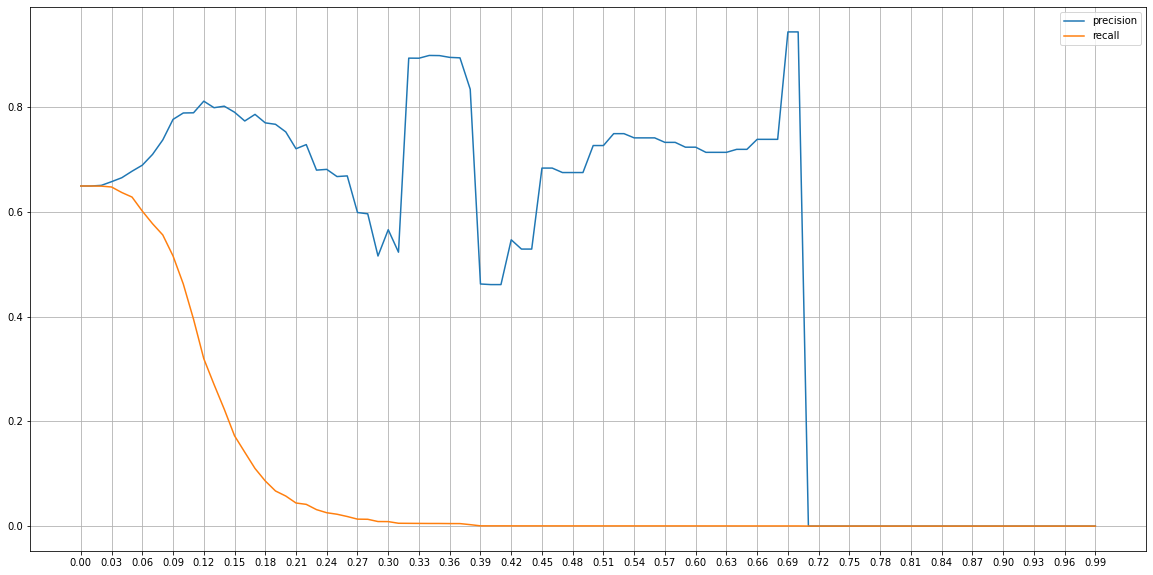

In [56]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(0, 1, 0.01), precision_list, label='precision')
plt.plot(np.arange(0, 1, 0.01), recall_list, label='recall')
plt.grid(b=True, axis='both')
plt.legend()
plt.xticks(ticks=np.arange(0, 1, 0.03))
plt.show()

#### лучшее значение

In [57]:
wwm.make_shy_prediction_by_p_cd(inf, mode='test', tr_shyness=0.09)
inf['method_topic2rubric_card2rubric_test'] = wwm.make_prediction_by_topic2rubric(inf, mode='test')
wwm.accuracy_on_test(inf, inf['method_topic2rubric_card2rubric_test'])
wwm.accuracy_on_test(inf, inf['p_cd_card2rubric_test'])
wwm.calc_all_scores(inf, inf['p_cd_card2rubric_test'])

44952  /  66104 0.6800193634273266
34128  /  66104 0.516277381096454
weight_1_0_10_50
precision 0.7772438452253524
recall 0.5162695711368278
tfind, ffind, ffindr, fignore, tignore, n := 34128 9780 0 22196 0 66104


(0.7772438452253524, 0.5162695711368278)

### для модели ModeStickTM

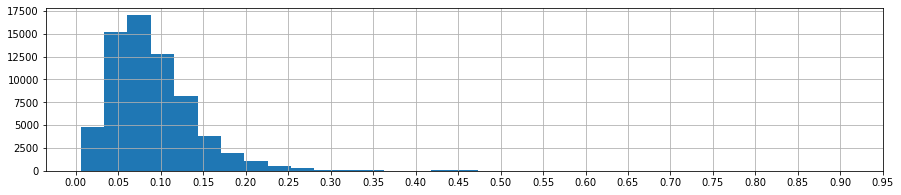

In [63]:
plt.figure(figsize=(15,3))
plt.hist(inf['theta_test'].max(), bins=30)
plt.grid(b=True, axis='both')
plt.xticks(ticks=np.arange(0, 1, 0.05))
plt.show()

In [59]:
wwm.make_shy_prediction_by_topic2rubric(inf, mode='test')
wwm.calc_all_scores(inf, inf['ModeStickTM_pred_card2rubric_test'])

weight_1_0_10_50
precision 0.7055167542964765
recall 0.6800090764692535
tfind, ffind, ffindr, fignore, tignore, n := 44952 18762 0 2390 0 66104


(0.7055167542964765, 0.6800090764692535)

In [67]:
precision_list = []
recall_list = []
to = 0.3
for tr in np.arange(0, to, 0.01):
    wwm.make_shy_prediction_by_topic2rubric(inf, mode='test', tr_shyness=tr)
    precision, recall = wwm.calc_all_scores(inf, inf['ModeStickTM_pred_card2rubric_test'])
    precision_list.append(precision)
    recall_list.append(recall)

weight_1_0_10_50
precision 0.7055167542964765
recall 0.6800090764692535
tfind, ffind, ffindr, fignore, tignore, n := 44952 18762 0 2390 0 66104
weight_1_0_10_50
precision 0.7062834875791525
recall 0.6799788215717419
tfind, ffind, ffindr, fignore, tignore, n := 44950 18692 0 2462 0 66104
weight_1_0_10_50
precision 0.7115619691701989
recall 0.6780425081310038
tfind, ffind, ffindr, fignore, tignore, n := 44822 18168 0 3114 0 66104
weight_1_0_10_50
precision 0.7194983645896682
recall 0.6622040692837153
tfind, ffind, ffindr, fignore, tignore, n := 43775 17065 0 5264 0 66104
weight_1_0_10_50
precision 0.7401184533075671
recall 0.6257166628848044
tfind, ffind, ffindr, fignore, tignore, n := 41363 14523 0 10218 0 66104
weight_1_0_10_50
precision 0.7486926376402844
recall 0.5782618561379623
tfind, ffind, ffindr, fignore, tignore, n := 38226 12830 0 15048 0 66104
weight_1_0_10_50
precision 0.7651376146788991
recall 0.5298842750170184
tfind, ffind, ffindr, fignore, tignore, n := 35028 10751 0 203

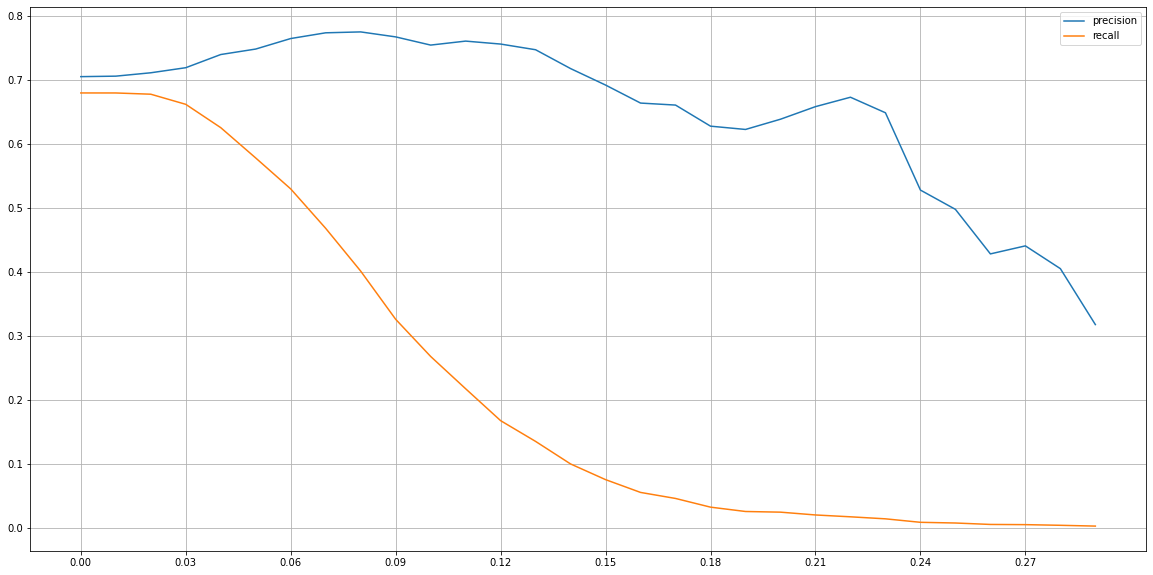

In [68]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(0, to, 0.01), precision_list, label='precision')
plt.plot(np.arange(0, to, 0.01), recall_list, label='recall')
plt.grid(b=True, axis='both')
plt.legend()
plt.xticks(ticks=np.arange(0, to, 0.03))
plt.show()

## Качество на разметке кастомных услуг

In [169]:
importlib.reload(data_preparing)
importlib.reload(artm_model)
importlib.reload(wwm)

artm.version() 0.9.2
artm.version() 0.9.2


<module 'work_with_model' from '/home/kozlinskii/study/nir/tm/service_cards/work_with_model.py'>

In [161]:
wwm.measure_score_on_marking(inf, 'marking_by_Anton.csv')

Все карточки подряд
ModeStickTM
weight_1_0_10_50
precision 0.23008829195726374
recall 0.4333326111123148
tfind, ffind, ffindr, fignore, tignore, n := 26 32 55 2 3 118

ProbStickTM
weight_1_0_10_50
precision 0.38461464497183656
recall 0.3333327777787037
tfind, ffind, ffindr, fignore, tignore, n := 20 7 25 33 33 118


 только те карточки, для которых можно найти услугу
ModeStickTM
weight_1_0_10_50
precision 0.4482750891808807
recall 0.4333326111123148
tfind, ffind, ffindr, fignore, tignore, n := 26 32 0 2 0 60

ProbStickTM
weight_1_0_10_50
precision 0.7407379972666768
recall 0.3333327777787037
tfind, ffind, ffindr, fignore, tignore, n := 20 7 0 33 0 60


In [164]:
ProbStickTM_pred = wwm.make_shy_prediction_by_p_cd(inf, mode='castom', tr_shyness=0.05)
ModeStickTM_pred = wwm.make_shy_prediction_by_topic2rubric(inf, mode='castom', tr_shyness=0.0)

In [165]:
wwm.measure_score_on_marking(inf, 'marking_by_Anton.csv', ProbStickTM_pred=ProbStickTM_pred, ModeStickTM_pred=ModeStickTM_pred)

Все карточки подряд
ModeStickTM
weight_1_0_10_50
precision 0.23008829195726374
recall 0.4333326111123148
tfind, ffind, ffindr, fignore, tignore, n := 26 32 55 2 3 118

ProbStickTM
weight_1_0_10_50
precision 0.24210500831051757
recall 0.3833326944455092
tfind, ffind, ffindr, fignore, tignore, n := 23 27 45 10 13 118


 только те карточки, для которых можно найти услугу
ModeStickTM
weight_1_0_10_50
precision 0.4482750891808807
recall 0.4333326111123148
tfind, ffind, ffindr, fignore, tignore, n := 26 32 0 2 0 60

ProbStickTM
weight_1_0_10_50
precision 0.45999908000184
recall 0.3833326944455092
tfind, ffind, ffindr, fignore, tignore, n := 23 27 0 10 0 60


In [170]:
marking = pd.read_csv('marking_by_Anton.csv', sep='\t')
marking_remont = marking[marking['card_parent_id'].map(
                    lambda x: str(x).find('/remont-i-stroitel_stvo') != -1)]
precision_all_list, recall_all_list, precision_on_rubric_cards_list, recall_on_rubric_cards_list = [],[],[],[]
to = 0.3
for tr in np.arange(0, to, 0.01):
    ProbStickTM_pred = wwm.make_shy_prediction_by_p_cd(inf, mode='castom', tr_shyness=tr)
    precision_all, recall_all, precision_on_rubric_cards, recall_on_rubric_cards = wwm.measure_pred_score_on_marking(inf, marking_remont, ProbStickTM_pred)
    precision_all_list.append(precision_all)
    recall_all_list.append(recall_all)
    precision_on_rubric_cards_list.append(precision_on_rubric_cards)
    recall_on_rubric_cards_list.append(recall_on_rubric_cards)
    


weight_1_0_10_50
precision 0.21186422723370574
recall 0.4166659722233796
tfind, ffind, ffindr, fignore, tignore, n := 25 35 58 0 0 118
weight_1_0_10_50
precision 0.4166659722233796
recall 0.4166659722233796
tfind, ffind, ffindr, fignore, tignore, n := 25 35 0 0 0 60
weight_1_0_10_50
precision 0.21186422723370574
recall 0.4166659722233796
tfind, ffind, ffindr, fignore, tignore, n := 25 35 58 0 0 118
weight_1_0_10_50
precision 0.4166659722233796
recall 0.4166659722233796
tfind, ffind, ffindr, fignore, tignore, n := 25 35 0 0 0 60
weight_1_0_10_50
precision 0.21367503104698202
recall 0.4166659722233796
tfind, ffind, ffindr, fignore, tignore, n := 25 35 57 0 1 118
weight_1_0_10_50
precision 0.4166659722233796
recall 0.4166659722233796
tfind, ffind, ffindr, fignore, tignore, n := 25 35 0 0 0 60
weight_1_0_10_50
precision 0.22222201646109585
recall 0.39999933333444443
tfind, ffind, ffindr, fignore, tignore, n := 24 31 53 5 5 118
weight_1_0_10_50
precision 0.4363628429766491
recall 0.39999933

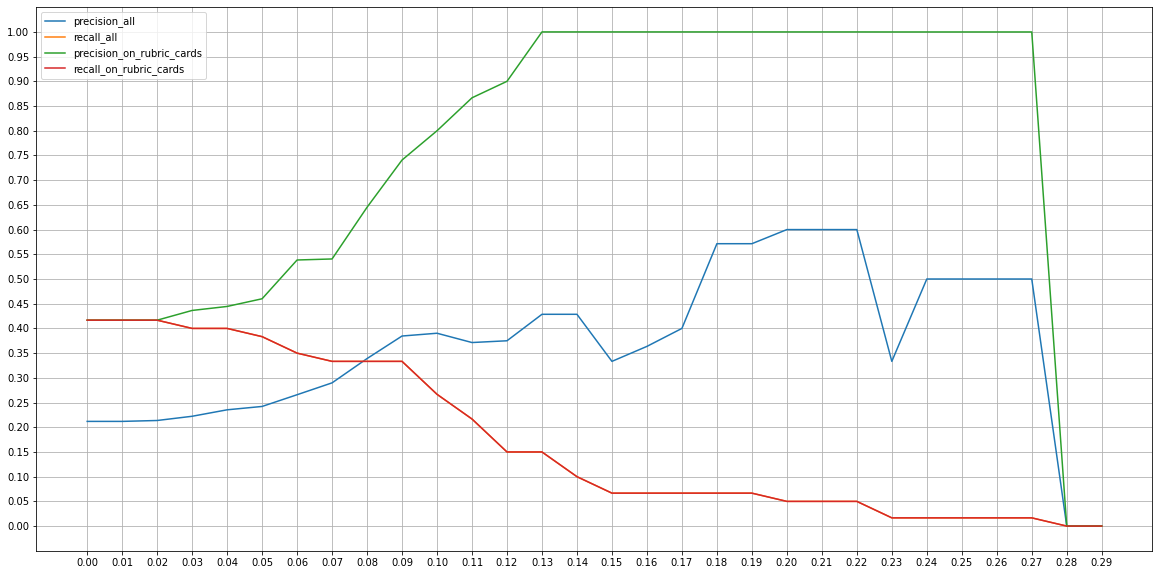

In [179]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(0, to, 0.01), precision_all_list, label='precision_all')
plt.plot(np.arange(0, to, 0.01), recall_all_list, label='recall_all')
plt.plot(np.arange(0, to, 0.01), precision_on_rubric_cards_list, label='precision_on_rubric_cards')
plt.plot(np.arange(0, to, 0.01), recall_on_rubric_cards_list, label='recall_on_rubric_cards')
plt.grid(b=True, axis='both')
plt.legend()
plt.xticks(ticks=np.arange(0, to, 0.01))
plt.yticks(ticks=np.arange(0, 1.05, 0.05))
plt.show()

In [76]:
marking = pd.read_csv('marking_by_Anton.csv', sep='\t')

In [70]:
marking_remont = marking[marking['card_parent_id'].map(lambda x: str(x).find('/remont-i-stroitel_stvo') != -1)]

In [93]:
len(set(marking_remont.card_id.values) - set(inf['card2rubric'].keys()))

17

In [96]:
len(set(marking_remont.card_id.values) & set(inf['card2rubric'].keys()))

118

In [94]:
marking_remont.head()

,card_id,card_parent_id,card_title,category_id,category_title,number_id
4,51c2dfe3-383a-4b5e-a377-76d1e3dd06d8,/remont-i-stroitel_stvo/stroitel_stvo-domov-i-...,Кирпичный дом 6 на 6,/remont-i-stroitel_stvo/stroitel_stvo-domov-i-...,Строительство дома из кирпича,1962
7,aa164525-8e1c-42c0-ab38-bddd17de51b6,/remont-i-stroitel_stvo/remont-kvartir-i-domov,Отделка туалета,NaN,NaN,0
9,2f8e40e9-be3f-49a9-9e23-66ee8dfc81f8,/remont-i-stroitel_stvo/dveri-i-zamki,"Вскрытие замков в квартире , открытие квартирн...",/remont-i-stroitel_stvo/dveri-i-zamki/vskrytie...,Вскрытие дверного замка,1427
10,5abeaafa-ad33-4cc1-8ac2-9cdaabc9d5d8,/remont-i-stroitel_stvo/remont-kvartir-i-domov,Капитальный ремонт однокомнатной квартиры,/remont-i-stroitel_stvo/remont-kvartir-i-domov...,Капитальный ремонт квартиры,1818
12,a9b90d05-c6d6-4a7d-8bb1-aea7ba472bf0,/remont-i-stroitel_stvo/okna-i-balkony,Установка алюминиевых дверей,/remont-i-stroitelstvo/okna-i-balkonyi/ustanov...,Установка балконной двери,4239


In [142]:
marking_remont_rubric = marking_remont[marking_remont.category_id.notna()]

In [120]:
wwm.calc_all_scores_on_marking(inf, marking_remont, inf['method_topic2rubric_card2rubric_castom'])

weight_1_0_10_50
precision 0.22807017543859648
recall 0.4262295081967213
tfind, ffind, ffindr, fignore, tignore, n := 26 32 55 2 3 118


(0.22807017543859648, 0.4262295081967213)

In [144]:
wwm.calc_all_scores_on_marking(inf, marking_remont_rubric, inf['method_topic2rubric_card2rubric_castom'])

weight_1_0_10_50
precision 0.4406779661016949
recall 0.4262295081967213
tfind, ffind, ffindr, fignore, tignore, n := 26 32 0 2 0 60


(0.4406779661016949, 0.4262295081967213)

In [ ]:
wwm.make_shy_prediction_by_topic2rubric(inf, mode='test', tr_shyness=tr)
precision, recall = wwm.calc_all_scores(inf, inf['ModeStickTM_pred_card2rubric_test'])

In [ ]:
wwm.make_shy_prediction_by_p_cd(inf, mode='test', tr_shyness=0.09)
wwm.calc_all_scores(inf, inf['p_cd_card2rubric_test'])

In [146]:
_ = wwm.make_shy_prediction_by_topic2rubric(inf, mode='castom', tr_shyness=0.0)

In [147]:
_ = wwm.make_shy_prediction_by_p_cd(inf, mode='castom', tr_shyness=0.09)

### Лучшая модель с декорелированными темами

In [3]:
inf_dec_8000 = {}
inf_dec_8000['exp_name'] = 'weight_1_0_10_50'
inf_dec_8000['test_size'] = 0.1
inf_dec_8000['num_collection_passes'] = 15
inf_dec_8000['topic_number'] = 750
inf_dec_8000['data_path'] = "service_cards_tokenised_remont_only"

inf_dec_8000['docs'] = data_preparing.read_and_prepared(inf_dec_8000['data_path'])
inf_dec_8000['path_train'], inf_dec_8000['path_test'] = data_preparing.form_test_train_set(
                docs=inf_dec_8000['docs'], name=inf_dec_8000['exp_name'], test_size=inf_dec_8000['test_size'])
inf_dec_8000['path_castom'] = data_preparing.form_castom_set(inf_dec_8000['docs'], name=inf_dec_8000['exp_name'])
inf_dec_8000['model'], inf_dec_8000['theta_train'] = artm_model.create_and_learn_ARTM_decorPhi_modal(
                                            inf_dec_8000['path_train'], 
                                            topic_number=inf_dec_8000['topic_number'], 
                                            num_collection_passes=inf_dec_8000['num_collection_passes'], 
                                            weigths=[1., 0., 10., 50.],
                                            decorTau=8000
                                         )

inf_dec_8000['theta_test'] = wwm.get_theta_from_vw(inf_dec_8000, inf_dec_8000['path_test'])
inf_dec_8000['theta_castom'] = wwm.get_theta_from_vw(inf_dec_8000, inf_dec_8000['path_castom'])
clear_output(True)

wwm.make_docs_dicts(inf_dec_8000)
wwm.form_card2topic(inf_dec_8000)
wwm.get_topic2rubric(inf_dec_8000)
#wwm.measure_accuracy_on_test(inf_dec_8000)
wwm.make_prediction_by_p_cd(inf_dec_8000, mode='castom')
inf_dec_8000['method_topic2rubric_card2rubric_castom'] = wwm.make_prediction_by_topic2rubric(inf_dec_8000, mode='castom')
wwm.make_prediction_by_p_cd(inf_dec_8000, mode='test')
inf_dec_8000['method_topic2rubric_card2rubric_test'] = wwm.make_prediction_by_topic2rubric(inf_dec_8000, mode='test')

NameError: name 'scoreModeStick' is not defined

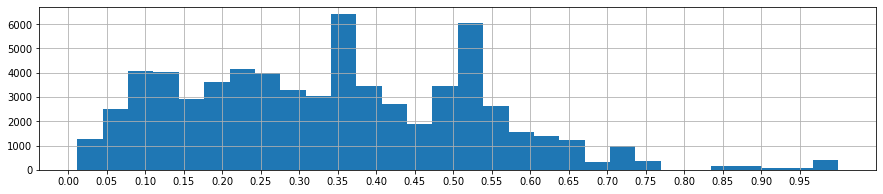

In [5]:
plt.figure(figsize=(15,3))
plt.hist(inf_dec_8000['p_cd_test'].max(), bins=30)
plt.grid(b=True, axis='both')
plt.xticks(ticks=np.arange(0, 1, 0.05))
plt.show()

In [6]:
precision_list = []
recall_list = []
for tr in np.arange(0, 1, 0.01):
    wwm.make_shy_prediction_by_p_cd(inf_dec_8000, mode='test', tr_shyness=tr)
    wwm.accuracy_on_test(inf_dec_8000, inf_dec_8000['p_cd_card2rubric_test'])
    precision, recall = wwm.calc_all_scores(inf_dec_8000, inf_dec_8000['p_cd_card2rubric_test'])
    precision_list.append(precision)
    recall_list.append(recall)

50490  /  66104 0.7637964419702288
weight_1_0_10_50
precision 0.763796440814782
recall 0.763796440814782
tfind, ffind, ffindr, fignore, tignore, n := 50490 15614 0 0 0 66104
50490  /  66104 0.7637964419702288
weight_1_0_10_50
precision 0.763796440814782
recall 0.763796440814782
tfind, ffind, ffindr, fignore, tignore, n := 50490 15614 0 0 0 66104
50487  /  66104 0.7637510589374319
weight_1_0_10_50
precision 0.7645259464171207
recall 0.7637510577820539
tfind, ffind, ffindr, fignore, tignore, n := 50487 15550 0 67 0 66104
50433  /  66104 0.7629341643470894
weight_1_0_10_50
precision 0.7676022027219838
recall 0.7629341631929472
tfind, ffind, ffindr, fignore, tignore, n := 50433 15269 0 402 0 66104
50319  /  66104 0.7612096091008108
weight_1_0_10_50
precision 0.7726763190076067
recall 0.7612096079492774
tfind, ffind, ffindr, fignore, tignore, n := 50319 14804 0 981 0 66104
50172  /  66104 0.7589858404937674
weight_1_0_10_50
precision 0.7780896686185238
recall 0.758985839345598
tfind, ffind,

19052  /  66104 0.28821251361490985
weight_1_0_10_50
precision 0.9792351923353454
recall 0.2882125131789112
tfind, ffind, ffindr, fignore, tignore, n := 19052 404 0 46648 0 66104
18454  /  66104 0.2791661624107467
weight_1_0_10_50
precision 0.9806047027971481
recall 0.27916616198843314
tfind, ffind, ffindr, fignore, tignore, n := 18454 365 0 47285 0 66104
18120  /  66104 0.2741135180927024
weight_1_0_10_50
precision 0.980678676296592
recall 0.27411351767803227
tfind, ffind, ffindr, fignore, tignore, n := 18120 357 0 47627 0 66104
17296  /  66104 0.26164831175118
weight_1_0_10_50
precision 0.9804432799702778
recall 0.2616483113553668
tfind, ffind, ffindr, fignore, tignore, n := 17296 345 0 48463 0 66104
16429  /  66104 0.2485326152729033
weight_1_0_10_50
precision 0.9806601744125817
recall 0.24853261489693115
tfind, ffind, ffindr, fignore, tignore, n := 16429 324 0 49351 0 66104
13697  /  66104 0.20720380007261285
weight_1_0_10_50
precision 0.9784270235129151
recall 0.20720379975916162


505  /  66104 0.007639477187462181
weight_1_0_10_50
precision 0.9474669892182009
recall 0.007639477175905425
tfind, ffind, ffindr, fignore, tignore, n := 505 28 0 65571 0 66104
440  /  66104 0.006656178143531405
weight_1_0_10_50
precision 0.9401707392797566
recall 0.006656178133462153
tfind, ffind, ffindr, fignore, tignore, n := 440 28 0 65636 0 66104
396  /  66104 0.005990560329178264
weight_1_0_10_50
precision 0.9339620438768765
recall 0.005990560320115938
tfind, ffind, ffindr, fignore, tignore, n := 396 28 0 65680 0 66104
395  /  66104 0.00597543265157933
weight_1_0_10_50
precision 0.9705157320600167
recall 0.005975432642539887
tfind, ffind, ffindr, fignore, tignore, n := 395 12 0 65697 0 66104
395  /  66104 0.00597543265157933
weight_1_0_10_50
precision 0.9705157320600167
recall 0.005975432642539887
tfind, ffind, ffindr, fignore, tignore, n := 395 12 0 65697 0 66104
395  /  66104 0.00597543265157933
weight_1_0_10_50
precision 0.9705157320600167
recall 0.005975432642539887
tfind, ff

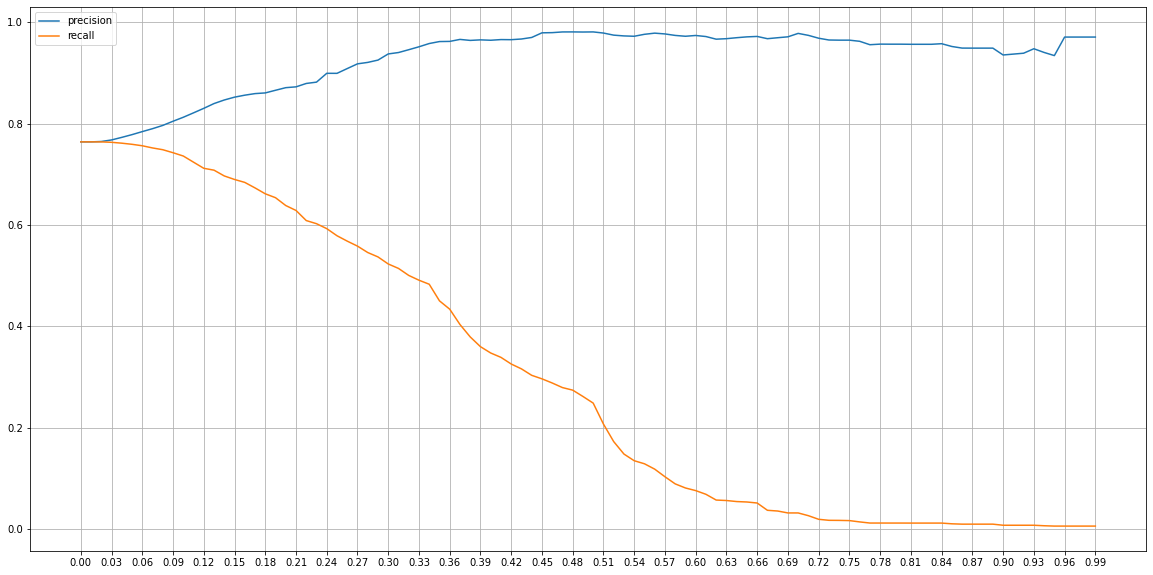

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(0, 1, 0.01), precision_list, label='precision')
plt.plot(np.arange(0, 1, 0.01), recall_list, label='recall')
plt.grid(b=True, axis='both')
plt.legend()
plt.xticks(ticks=np.arange(0, 1, 0.03))
plt.show()

In [8]:
marking = pd.read_csv('marking_by_Anton.csv', sep='\t')
marking_remont = marking[marking['card_parent_id'].map(
                    lambda x: str(x).find('/remont-i-stroitel_stvo') != -1)]
precision_all_list, recall_all_list, precision_on_rubric_cards_list, recall_on_rubric_cards_list = [],[],[],[]
to = 1.0
for tr in np.arange(0, to, 0.01):
    ProbStickTM_pred = wwm.make_shy_prediction_by_p_cd(inf_dec_8000, mode='castom', tr_shyness=tr)
    precision_all, recall_all, precision_on_rubric_cards, recall_on_rubric_cards = wwm.measure_pred_score_on_marking(inf_dec_8000, marking_remont, ProbStickTM_pred)
    precision_all_list.append(precision_all)
    recall_all_list.append(recall_all)
    precision_on_rubric_cards_list.append(precision_on_rubric_cards)
    recall_on_rubric_cards_list.append(recall_on_rubric_cards)

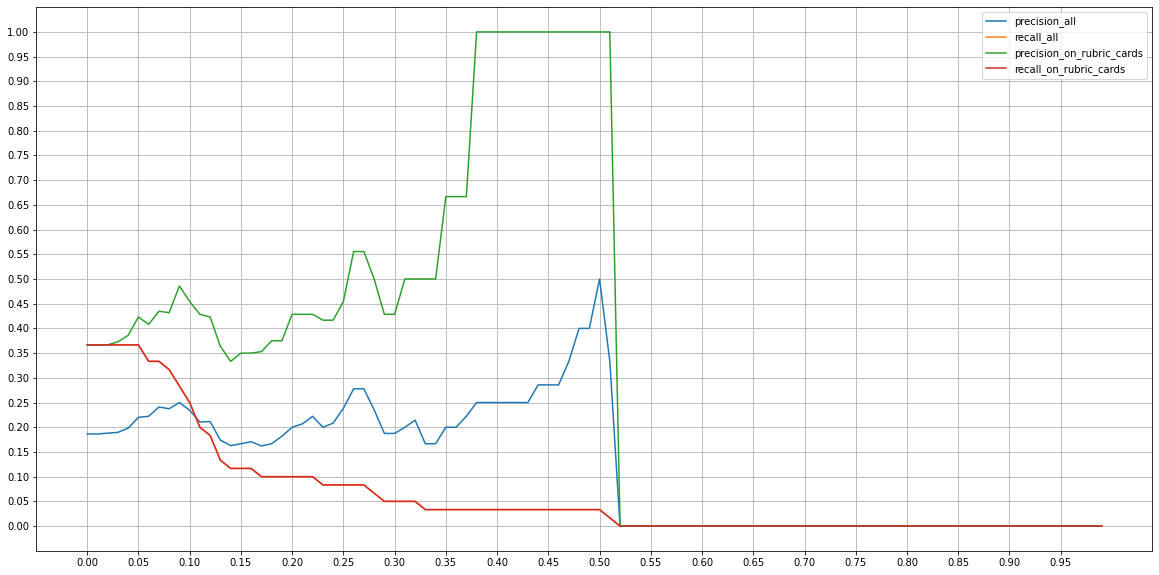

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(0, to, 0.01), precision_all_list, label='precision_all')
plt.plot(np.arange(0, to, 0.01), recall_all_list, label='recall_all')
plt.plot(np.arange(0, to, 0.01), precision_on_rubric_cards_list, label='precision_on_rubric_cards')
plt.plot(np.arange(0, to, 0.01), recall_on_rubric_cards_list, label='recall_on_rubric_cards')
plt.grid(b=True, axis='both')
plt.legend()
plt.xticks(ticks=np.arange(0, to, 0.05))
plt.yticks(ticks=np.arange(0, 1.05, 0.05))
plt.show()

In [12]:
precision_on_rubric_cards_list[0]

0.36666605555657406